In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import statsmodels.formula.api as smf
import pingouin as pg

In [2]:
# Load the mpg dataset from Seaborn and select models from the years 70, 76, and 82
cars_raw = sns.load_dataset("mpg")
cars = cars_raw[cars_raw["model_year"].isin((70,76,82))]
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Text(0.5, 1.0, 'MPG vs Weight for Model Years 70, 76, and 82')

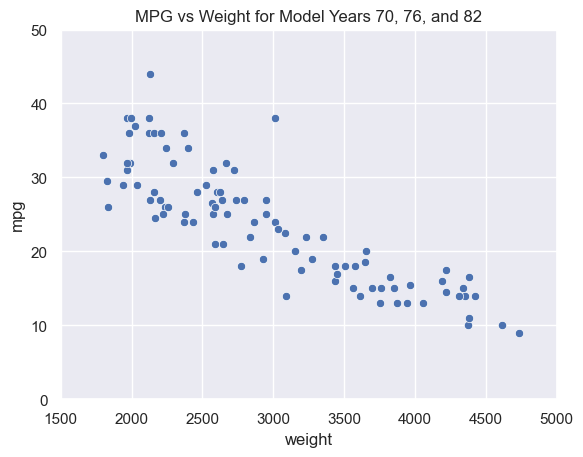

In [3]:
# Scatterplot of mgp and weight
sns.scatterplot(x= "weight", y = "mpg", data = cars)
plt.ylim((0, 50))
plt.xlim((1500, 5000))
plt.title("MPG vs Weight for Model Years 70, 76, and 82")

In [4]:
# fit model
fitted_model = smf.ols('mpg ~ weight', data=cars).fit()
# display estimated parameters
fitted_model.params

Intercept    49.237630
weight       -0.008612
dtype: float64

In [5]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     259.3
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           1.64e-28
Time:                        13:10:55   Log-Likelihood:                -265.79
No. Observations:                  94   AIC:                             535.6
Df Residuals:                      92   BIC:                             540.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.2376      1.641     30.002      0.000      45.978      52.497
weight        -0.0086      0.001    -16.103      0.000      -0.010      -0.008
==============================================================================
Omnibus:                       13.175   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.333
Skew:                           0.754   Prob(JB):                     0.000468
Kurtosis:                       4.280   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# R^2 by hand
cars.mpg.corr(cars.weight)**2

0.7381220256328102

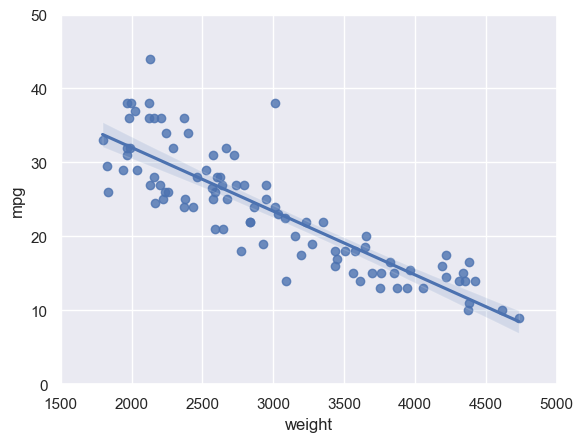

In [7]:
# Regression plot
sns.regplot(x= "weight", y = "mpg", data = cars)
plt.ylim((0,50))
plt.xlim((1500,5000))
plt.show()

Text(0.5, 1.0, 'Tukey-Anscombe Plot')

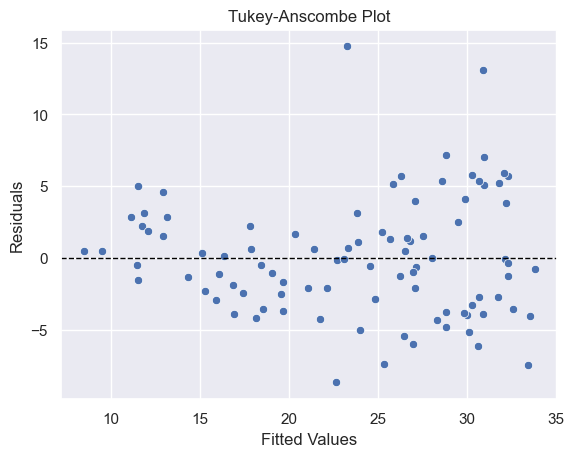

In [8]:
# Tukey-Anscombe plot
sns.scatterplot(x=fitted_model.fittedvalues, y=fitted_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Tukey-Anscombe Plot")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

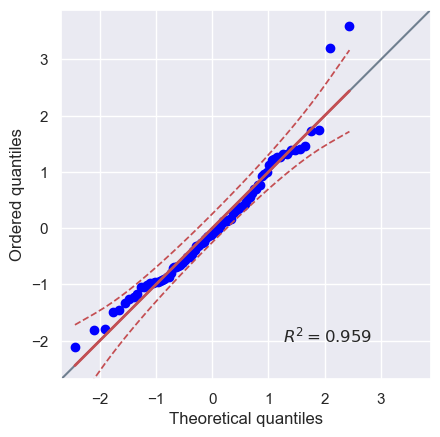

In [9]:
import pingouin as pg
pg.qqplot(fitted_model.resid)

# Multiple Regression

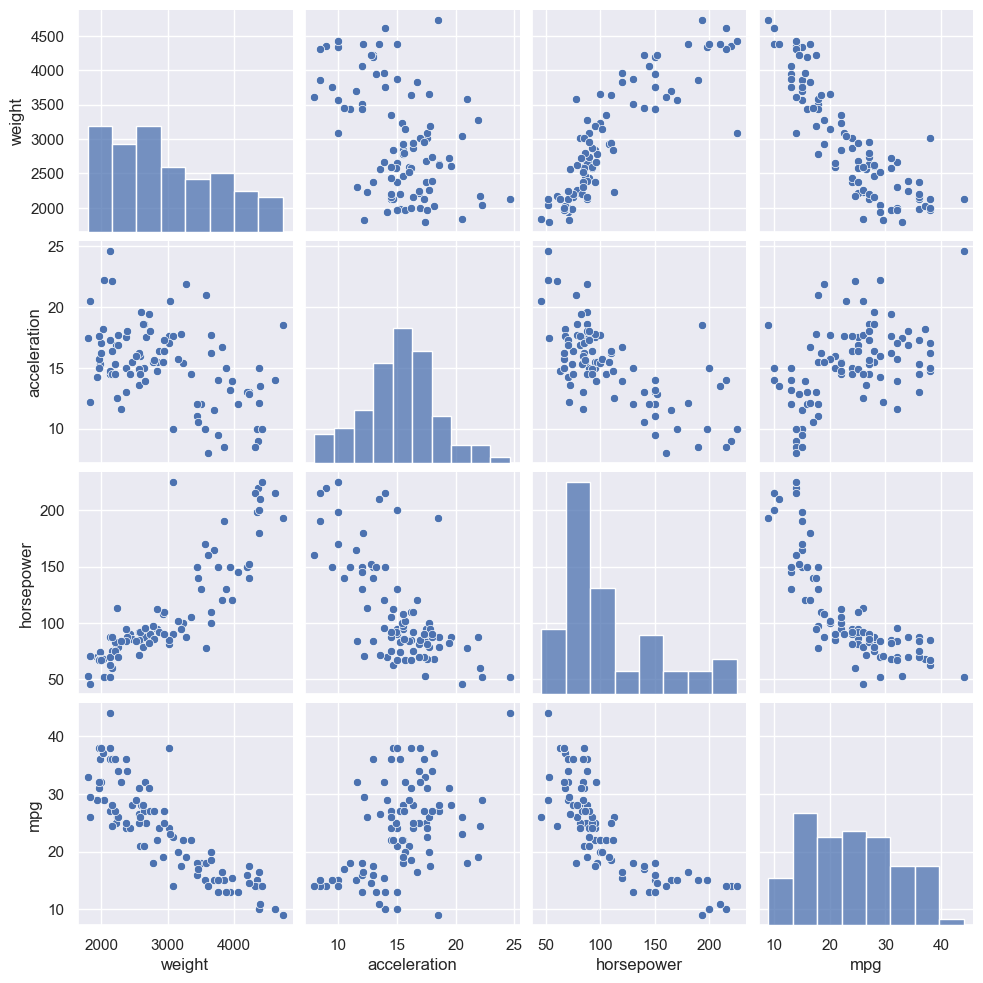

In [10]:
sns.pairplot(cars[['weight', 'acceleration', 'horsepower', 'mpg']])

In [11]:
# fit multiple linear regression model
car_mlm = smf.ols('mpg ~ weight + acceleration + horsepower', data=cars).fit()
car_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     89.99
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           7.38e-27
Time:                        13:11:01   Log-Likelihood:                -260.91
No. Observations:                  93   AIC:                             529.8
Df Residuals:                      89   BIC:                             540.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.9768      3.879     12.370      0.000      40.270      55.683
weight          -0.0065      0.001     -5.802      0.000      -0.009      -0.004
acceleration    -0.0116      0.193     -0.060      0.952      -0.396       0.373
horsepower      -0.0429      0.024     -1.766      0.081      -0.091       0.005
==============================================================================
Omnibus:                       11.648   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.105
Skew:                           0.779   Prob(JB):                      0.00235
Kurtosis:                       3.834   Cond. No.                     2.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Regression with Quadratic Term

In [12]:
# add a quadratic term for horsepower
cars['horsepower_squared'] = cars['horsepower'] ** 2

# fit the linear regression model 
cars_mlm2 = smf.ols('mpg ~ weight + acceleration + horsepower + horsepower_squared', data=cars).fit()
print(cars_mlm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     76.00
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           9.95e-28
Time:                        13:11:01   Log-Likelihood:                -256.29
No. Observations:                  93   AIC:                             522.6
Df Residuals:                      88   BIC:                             535.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             63.3625      6

/var/folders/79/mb1hycd508z4dzj6_g586h1w0000gq/T/ipykernel_4263/4136548885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['horsepower_squared'] = cars['horsepower'] ** 2


Text(0.5, 1.0, 'Tukey-Anscombe Plot')

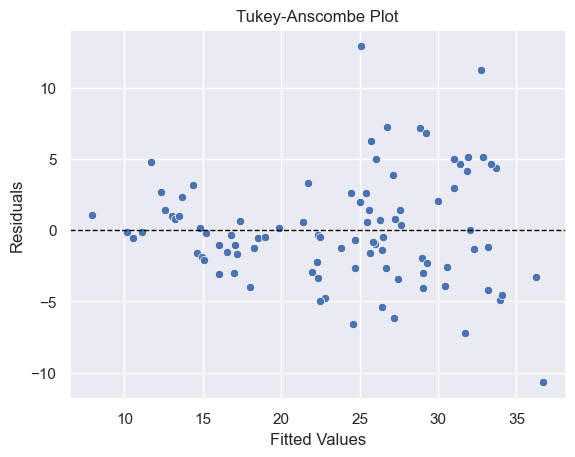

In [13]:
# Tukey-Anscombe plot
sns.scatterplot(x=cars_mlm2.fittedvalues, y=cars_mlm2.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Tukey-Anscombe Plot")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

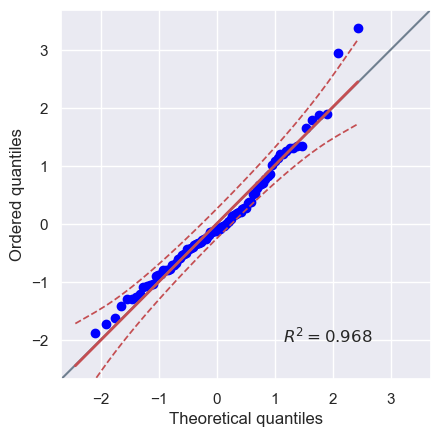

In [14]:
pg.qqplot(cars_mlm2.resid)

# Log Transform

In [15]:
# log transform
cars['mpg_log'] = np.log(cars['mpg'])

# fit the linear regression model 
cars_mlm3 = smf.ols('mpg_log ~ weight + acceleration + horsepower + horsepower_squared', data=cars).fit()
print(cars_mlm3.summary())

                            OLS Regression Results                            
Dep. Variable:                mpg_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           5.09e-34
Time:                        13:11:02   Log-Likelihood:                 47.553
No. Observations:                  93   AIC:                            -85.11
Df Residuals:                      88   BIC:                            -72.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8085      0

/var/folders/79/mb1hycd508z4dzj6_g586h1w0000gq/T/ipykernel_4263/3200865852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['mpg_log'] = np.log(cars['mpg'])


Text(0.5, 1.0, 'Tukey-Anscombe Plot')

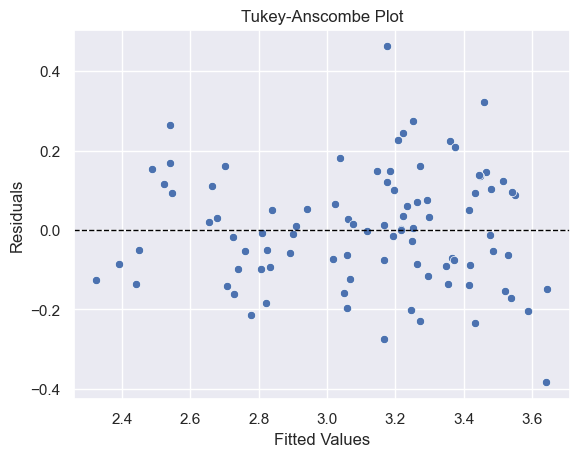

In [16]:
# Tukey-Anscombe plot
sns.scatterplot(x=cars_mlm3.fittedvalues, y=cars_mlm3.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Tukey-Anscombe Plot")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

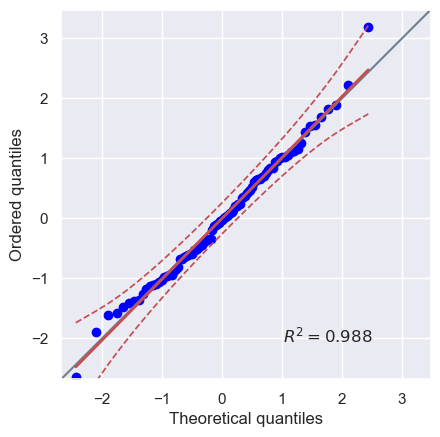

In [17]:
pg.qqplot(cars_mlm3.resid)

## Predictions

In [18]:
NewData = pd.DataFrame({"Intercept": [1],
                        "weight": [2000],
                        "acceleration": [20],
                        "horsepower": [100],
                        "horsepower_squared": [10000]})
NewData

,Intercept,weight,acceleration,horsepower,horsepower_squared
0,1,2000,20,100,10000


In [19]:
cars_mlm2.predict(NewData)

0    25.757459
dtype: float64

In [20]:
# alternatively 'by hand':
NewData.dot(cars_mlm2.params)

0    25.757459
dtype: float64

In [21]:
# alternatively, truly 'by hand':
b = cars_mlm2.params
NewY = b.iloc[0] + b.iloc[1]*NewData.iloc[0,1] + b.iloc[2]*NewData.iloc[0,2] + b.iloc[3]*NewData.iloc[0,3] + b.iloc[4]*NewData.iloc[0,4]
NewY

25.75745923967315

### Predictions with log transformed model

In [22]:
# log(mpg)
logY = cars_mlm3.predict(NewData)

In [23]:
# mpg = exp(log(mpg))
np.exp(logY)

0    24.798889
dtype: float64